The task is to estimate a fair value an owner should charge for **daily accommodation**. With the increase in hotels at different locations. This will give recommendation for the **price of accommodation** at hotel with different constraints.

1. The neighborhood is **Harlem**
1. The location is **lon:-73.783909, lat:40.8498289**
1. The current review score rating **95.0**
1. Number of reviews **53**
1. Minimum nights **4**
1. The house can accomodate **10** people.
1. The bed type is **Real Bed**
1. The house has **3 bathrooms, 5 bedrooms, 7 beds**.
1. The house is available for **25 of the next 30 days**
1. The client has **profile picture**, and they are a **superhost**.
1. The cancelation policy is **strict**.
1. The room type is **entire home/apartment** and property type is **House**



In [276]:
# Defining our Sample Client Data
from dateutil import parser
dict_client = {}

dict_client["neighbourhood_cleansed"] = "Harlem"
dict_client["longitude"] = -73.783909
dict_client["latitude"] = 40.8498289
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 3
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 4
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["bed_type"] = 'Real Bed'
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_30"] = 25
dict_client["host_has_profile_pic"] = 't'  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = 't'
dict_client["cancellation_policy"] = "strict"

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Loading the data and necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df=pd.read_csv("New York.csv",na_values=['NA','.',' '],index_col=['id'])

In [141]:
df.head(10)

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,room_type,...,maximum_nights,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
18461891,NaN,NaN,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,Entire home/apt,...,6,5 months ago,0,0,NaN,f,f,strict,f,NaN
20702398,within an hour,100%,f,t,City Island,40.849191,-73.786509,f,House,Private room,...,21,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00
6627449,within an hour,100%,f,t,City Island,40.849775,-73.786609,t,Apartment,Entire home/apt,...,21,2 weeks ago,28,21,95.0,f,f,strict,f,0.77
19949243,within a few hours,100%,f,t,City Island,40.848838,-73.782276,f,Boat,Entire home/apt,...,1125,6 days ago,30,0,NaN,t,f,strict,f,NaN
1886820,NaN,NaN,f,t,City Island,40.841144,-73.783052,t,House,Entire home/apt,...,90,16 months ago,30,0,NaN,f,f,strict,f,NaN
5557381,within an hour,100%,t,t,City Island,40.850024,-73.789328,t,House,Private room,...,1125,a week ago,0,94,97.0,t,f,moderate,f,3.27
19609887,within an hour,100%,f,t,City Island,40.851980,-73.789304,t,Apartment,Entire home/apt,...,1125,a week ago,24,3,100.0,f,f,flexible,f,1.58
7949480,within an hour,100%,t,t,City Island,40.852054,-73.788680,t,House,Private room,...,7,4 days ago,29,31,100.0,f,f,moderate,t,1.49
21057372,within a few hours,100%,f,t,City Island,40.842124,-73.785197,f,Boat,Entire home/apt,...,1125,3 days ago,29,0,NaN,t,f,strict,f,NaN


In [142]:
aa=df.columns
aa

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'reviews_per_month'],
      dtype='object')

In [143]:
#top 10 values of all the columns
for i in aa:
    xx=print(df[i].head(15))
    print(xx)

id
18461891                   NaN
20702398        within an hour
6627449         within an hour
19949243    within a few hours
1886820                    NaN
5557381         within an hour
19609887        within an hour
7949480         within an hour
21057372    within a few hours
16042478                   NaN
9147025         within an hour
1936633     a few days or more
19758402        within an hour
11675715        within an hour
3400359         within an hour
Name: host_response_time, dtype: object
None
id
18461891     NaN
20702398    100%
6627449     100%
19949243    100%
1886820      NaN
5557381     100%
19609887    100%
7949480     100%
21057372    100%
16042478     NaN
9147025     100%
1936633      33%
19758402    100%
11675715    100%
3400359     100%
Name: host_response_rate, dtype: object
None
id
18461891    f
20702398    f
6627449     f
19949243    f
1886820     f
5557381     t
19609887    f
7949480     t
21057372    f
16042478    f
9147025     t
1936633     f
19758402    f

**checking missing values**

In [144]:
df.isna().sum()

host_response_time               13679
host_response_rate               13679
host_is_superhost                  232
host_has_profile_pic               232
neighbourhood_cleansed               0
latitude                             0
longitude                            0
is_location_exact                    0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                          144
bedrooms                            73
beds                                91
bed_type                             0
amenities                            0
square_feet                      43768
price                                0
guests_included                      0
minimum_nights                       0
maximum_nights                       0
calendar_updated                     0
availability_30                      0
number_of_reviews                    0
review_scores_rating             10099
instant_bookable         

In [145]:
missing_percent = (df.isnull().sum() * 100)/len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'missing_percent': percent_missing})

In [146]:
missing_value_df.sort_values(by='missing_percent',ascending=False)

,column_name,missing_percent
square_feet,square_feet,98.761198
host_response_time,host_response_time,30.866259
host_response_rate,host_response_rate,30.866259
review_scores_rating,review_scores_rating,22.788095
reviews_per_month,reviews_per_month,21.377801
host_is_superhost,host_is_superhost,0.523501
host_has_profile_pic,host_has_profile_pic,0.523501
bathrooms,bathrooms,0.324932
beds,beds,0.205339
bedrooms,bedrooms,0.164722


>**square feet** has 99% approx missing values. So we will drop that particular column.

>**host_response_time** and **host_response_rate** has 31% approx missing values as we won't be using these features for our model we will leave it untreated.

>**review_scores_rating**,**reviews_per_month**,**host_is_superhost** ,**host_has_profile_pic**, **bathrooms** ,**beds** **bedrooms** has missing values less 30%. We will treat these missing values as we will use these constraints in our predicting model.


*Checking info and Summary Statistics*

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44317 entries, 18461891 to 21135710
Data columns (total 30 columns):
host_response_time               30638 non-null object
host_response_rate               30638 non-null object
host_is_superhost                44085 non-null object
host_has_profile_pic             44085 non-null object
neighbourhood_cleansed           44317 non-null object
latitude                         44317 non-null float64
longitude                        44317 non-null float64
is_location_exact                44317 non-null object
property_type                    44317 non-null object
room_type                        44317 non-null object
accommodates                     44317 non-null int64
bathrooms                        44173 non-null float64
bedrooms                         44244 non-null float64
beds                             44226 non-null float64
bed_type                         44317 non-null object
amenities                        44317 non-null obje

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44045 entries, 0 to 44044
Data columns (total 24 columns):
host_is_superhost           44045 non-null object
host_has_profile_pic        44045 non-null object
neighbourhood_cleansed      44045 non-null object
latitude                    44045 non-null float64
longitude                   44045 non-null float64
property_type               44045 non-null object
room_type                   44045 non-null object
accommodates                44045 non-null int64
bathrooms                   44045 non-null int32
bedrooms                    44045 non-null float64
beds                        44045 non-null float64
bed_type                    44045 non-null object
amenities                   44045 non-null object
price                       44045 non-null float64
guests_included             44045 non-null int64
minimum_nights              44045 non-null int64
maximum_nights              44045 non-null int64
availability_30             44045 non-nul

The data has 44317 rows and 30 columns in which price is the dependent variable i.e. price of the hotel. With int and object datatype.Few constraints have less than 30% missing values which we will further treat .While few constraints have more than 30% and 99% missing values, so we will drop those particular columns.

The Average hotel price is $105.00$ and 75 percent quantile is $175$ while the most expensive is $10000.00.
The minimum value is 0 which is not possible.SO we will treat them as incorrect data and drop those values and further treat them.

In [150]:
df.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,reviews_per_month
count,44317.000000,44317.000000,44317.000000,44173.000000,44244.000000,44226.000000,549.000000,44317.000000,44317.000000,44317.000000,4.431700e+04,44317.000000,44317.000000,34218.000000,34843.000000
mean,40.730049,-73.954700,2.813255,1.132739,1.158892,1.555895,727.732240,147.675948,1.482388,4.008665,6.421371e+04,5.904484,18.145836,93.487492,1.446368
std,0.053905,0.042382,1.853114,0.412206,0.721120,1.071849,633.253518,209.138888,1.090597,12.574811,1.049199e+07,9.099126,33.066623,8.209607,1.638707
min,40.499794,-74.253269,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,20.000000,0.010000
25%,40.691219,-73.983490,2.000000,1.000000,1.000000,1.000000,325.000000,70.000000,1.000000,1.000000,2.900000e+01,0.000000,1.000000,90.000000,0.270000
50%,40.723624,-73.956728,2.000000,1.000000,1.000000,1.000000,700.000000,105.000000,1.000000,2.000000,1.125000e+03,0.000000,5.000000,96.000000,0.870000
75%,40.764029,-73.939366,4.000000,1.000000,1.000000,2.000000,925.000000,175.000000,2.000000,4.000000,1.125000e+03,9.000000,20.000000,100.000000,2.100000
max,40.909174,-73.710126,16.000000,15.500000,14.000000,40.000000,5000.000000,10000.000000,16.000000,1250.000000,2.147484e+09,30.000000,489.000000,100.000000,24.530000


In [151]:
#selecting only small number of features necessary for the study\
df=df[['host_is_superhost','host_has_profile_pic', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type','accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
        'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy','reviews_per_month']]


In [152]:
df.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')

**Treating missing values**

In [153]:
df.isna().sum()

host_is_superhost             232
host_has_profile_pic          232
neighbourhood_cleansed          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                     144
bedrooms                       73
beds                           91
bed_type                        0
amenities                       0
price                           0
guests_included                 0
minimum_nights                  0
maximum_nights                  0
availability_30                 0
number_of_reviews               0
review_scores_rating        10099
instant_bookable                0
is_business_travel_ready        0
cancellation_policy             0
reviews_per_month            9474
dtype: int64

In [154]:
df['host_is_superhost'].fillna(method='bfill',inplace=True)

In [155]:
df.host_has_profile_pic.value_counts()

t    43961
f      124
Name: host_has_profile_pic, dtype: int64

In [156]:
df['host_has_profile_pic'].fillna(method='ffill',inplace=True)

In [157]:
df['host_has_profile_pic'].value_counts()

t    44193
f      124
Name: host_has_profile_pic, dtype: int64

In [158]:
df['bathrooms'].fillna(method='ffill',inplace=True)

In [159]:
df['bathrooms']=df['bathrooms'].astype(int)

In [160]:
df['bathrooms'].value_counts()

1     40020
2      3654
3       329
0       164
4       111
5        23
6         9
8         5
15        1
7         1
Name: bathrooms, dtype: int64

Using **Imputer** for imputing missing values in beds, bedrooms, review_scores_rating, reviews_per_month columns

In [164]:
from sklearn.impute import SimpleImputer 
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imp.fit(df.iloc[:,[9,10,19,23]])
df.iloc[:,[9,10,19,23]]=imputer.transform(df.iloc[:,[9,10,19,23]])

In [165]:
df.isna().sum()

host_is_superhost           0
host_has_profile_pic        0
neighbourhood_cleansed      0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
minimum_nights              0
maximum_nights              0
availability_30             0
number_of_reviews           0
review_scores_rating        0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
reviews_per_month           0
dtype: int64

*Checking Outliers and incorrect data*

In [166]:
a = df
Q1 = a.quantile(0.25)
Q3 = a.quantile(0.75)
IQR = Q3 - Q1
((a < (Q1 - 1.5 * IQR)) | (a > (Q3 + 1.5 * IQR))).sum()

accommodates                 1291
amenities                       0
availability_30              4724
bathrooms                    4297
bed_type                        0
bedrooms                    11997
beds                         2322
cancellation_policy             0
guests_included              2904
host_has_profile_pic            0
host_is_superhost               0
instant_bookable                0
is_business_travel_ready        0
latitude                      324
longitude                    2213
maximum_nights                 65
minimum_nights               2892
neighbourhood_cleansed          0
number_of_reviews            5015
price                        2500
property_type                   0
review_scores_rating         3959
reviews_per_month            3585
room_type                       0
dtype: int64

**Price**

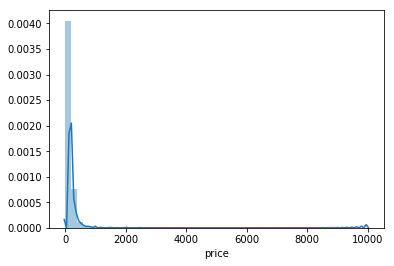

In [167]:
import seaborn as sns
sns.distplot(df['price'])

From the above distribution graph we can see it is highly skewed with majority being close to the bottom.Lets check the skew to check for the symmetry of the data distribution and kurtosis of the price columns
Kurtosis is the degree of peakedness of a distribution

In [169]:
print("Skew of Price:",df['price'].skew())
print("Kurtosis of Price:",df['price'].kurtosis())

Skew of Price: 21.47165593309586
Kurtosis of Price: 820.1830714715655


Since the skew value is high. We will remove the outliers thus take 99.5% as the threshold and remove the higher values.There's still lot of difference between mean,Median and 99.5% quantile value

In [172]:
print(df["price"].quantile(0.995))
print(df["price"].mean())
print(df["price"].median())

1000.0
147.67594828169777
105.0


In [174]:
df.loc[df['price']>(df["price"].quantile(0.995)),'price']=df['price'].quantile(0.99)
#df = df[df["price"]<df["price"].quantile(0.995)].reset_index(drop=True)

In [180]:
#few hotels price is 0 which is not possible so we will impute it with mean value
df.loc[df['price']<3,'price']=df['price'].mean()

In [181]:
df['price'].skew()

2.5169470307218282

In [185]:
items = df['property_type'].value_counts()

# Storing a list of property types whicha are less in number i.e. the types that have a count less than 10 
less_items = list(items.loc[items <= 10].index.values)

# drop the property types that were rare
df = df[~df["property_type"].isin(less_items)].reset_index(drop=True)
# Sanity check
df["property_type"].value_counts()

Apartment          37349
House               3691
Loft                 868
Townhouse            804
Condominium          584
Other                287
Bed & Breakfast      136
Timeshare             84
Guesthouse            57
Guest suite           54
Hostel                39
Dorm                  28
Boutique hotel        24
Villa                 21
Bungalow              19
Name: property_type, dtype: int64

Removing rare neighbourhoods. Where hotels are very few.

In [257]:
items = df['neighbourhood_cleansed'].value_counts()

# Storing a list of property types whicha are less in number i.e. the types that have a count less than 10 
less_items = list(items.loc[items <= 20].index.values)

# drop the property types that were rare
df = df[~df["neighbourhood_cleansed"].isin(less_items)].reset_index(drop=True)
# Sanity check
df["neighbourhood_cleansed"].value_counts()

Williamsburg                 3910
Bedford-Stuyvesant           3169
Harlem                       2618
Bushwick                     2197
East Village                 1951
Upper West Side              1903
Hell's Kitchen               1710
Upper East Side              1667
Crown Heights                1499
Midtown                      1102
East Harlem                  1095
Greenpoint                   1059
Chelsea                      1058
Lower East Side               949
Washington Heights            892
West Village                  838
Astoria                       833
Clinton Hill                  605
Flatbush                      586
Prospect-Lefferts Gardens     550
Park Slope                    508
Long Island City              447
Fort Greene                   436
Financial District            428
Kips Bay                      415
Greenwich Village             394
Chinatown                     391
Morningside Heights           388
Prospect Heights              351
SoHo          

For rest of the columns we will consider them as extreme values

# Exploratory Data Aanlysis

**Univariate Analysis**

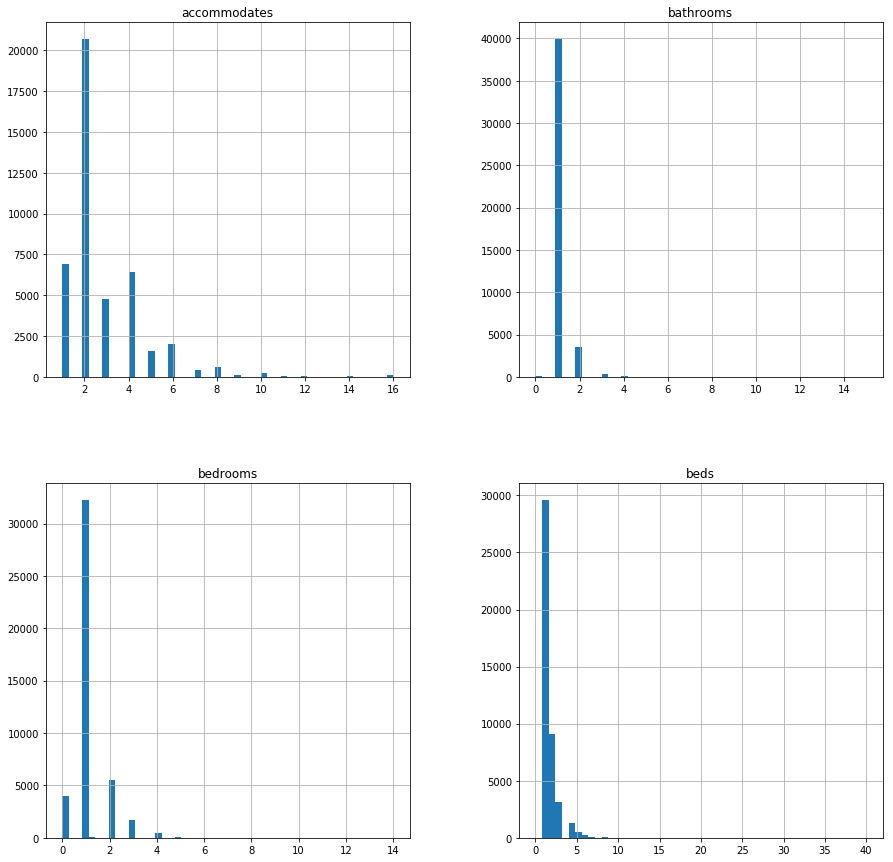

In [193]:
# Data Exploration - Let's explore 
%matplotlib inline
import matplotlib.pyplot as plt

try:
    # We select all rows and all columns after the 6th
    df.iloc[:,[7,8,9,10]].hist(bins=50, figsize=(15,15))
    plt.show()
except AttributeError:
    pass


>Number of accommodates are between 1 to 16 .Maximum hotels have 2 accommodation room followed by 1 and 4.While there are few hotels which have a room of **accommodattion for 8 to 16 people**

>The number of bathrooms a hotel room has is between 0 to 4.With maximum number of hotels having **1 bathroom followed by 2**.

>Hotel rooms have 0 to 5 bedrooms. where most hotels have **1 bedrooom**.

>Hotels have 1 to 9 number of beds. Where most of the hotels have **1 to 3 beds**.

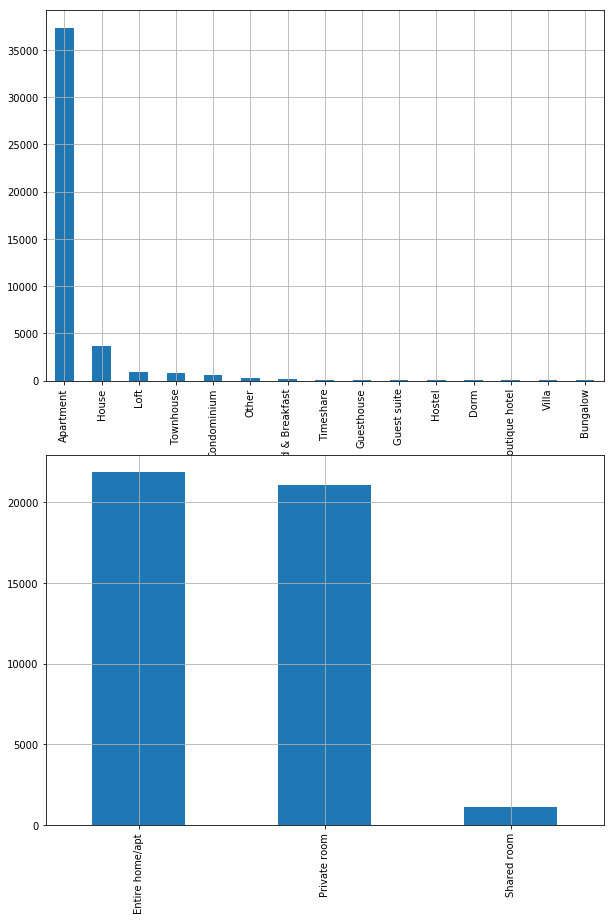

In [221]:
plt.show()
fig,ax = plt.subplots(2,1, figsize=(10,15))                      
df['property_type'].value_counts().plot( ax = ax[0],kind='bar',grid=True)
df['room_type'].value_counts().plot(ax = ax[1],kind='bar',grid=True)
#df.neighbourhood_cleansed.value_counts().plot(ax = ax[1,0],kind='bar',grid=True)

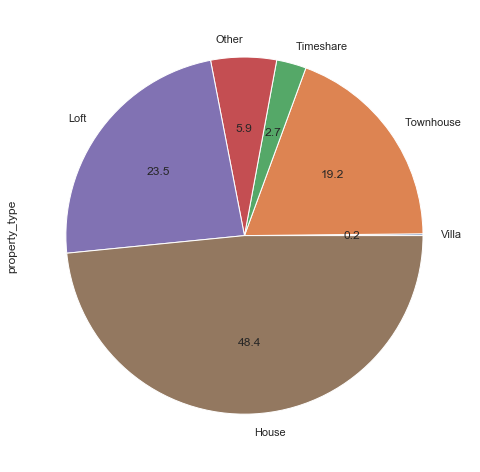

In [505]:
df.property_type.value_counts().sort_index(ascending=False).head(6).plot(kind='pie',autopct='%.1f')

We can see the percentage of different property type with House having 48.4% followed by loft 23.5%

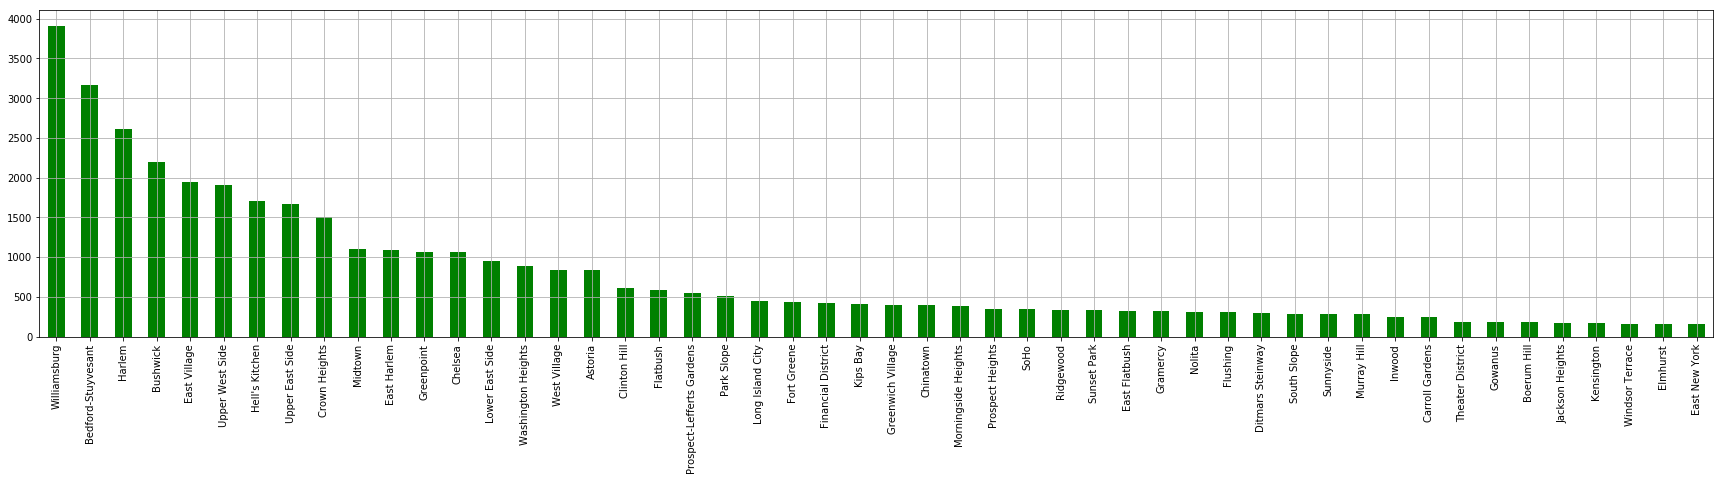

In [258]:
plt.figure(figsize=(30,6))
df.neighbourhood_cleansed.value_counts().head(50).plot(kind='bar',grid=True,color='g')

From the above graphs we can infer that most of the property type is **apartment** =37349 followed by House,Loft
And **room type** is entire home or apartment or private room.It can be seen that hotels having shared rooms is very less in number.
Majority of the hotels **neighbourhood** is Williamsburg followed by Bedford_Stuyvesant,Harlem.These neighbourhoods have more number of hotels compared to other neighbourhood.

Label encoding the categorical column with True and false



1 for True and 0 for False

In [304]:
df["host_has_profile_pic"] = df["host_has_profile_pic"].apply(lambda x: 1 if x=="t" else 0)
df["host_is_superhost"] = df["host_is_superhost"].apply(lambda x: 1 if x=="t" else 0)

In [ ]:
list_of_30 = list(df["neighbourhood_cleansed"].value_counts().head(30).index)
df = df[df["neighbourhood_cleansed"].isin(list_of_30)].reset_index(drop=True)

In [313]:
df['neighbourhood_cleansed'].value_counts()

Williamsburg                 3910
Bedford-Stuyvesant           3169
Harlem                       2618
Bushwick                     2197
East Village                 1951
Upper West Side              1903
Hell's Kitchen               1710
Upper East Side              1667
Crown Heights                1499
Midtown                      1102
East Harlem                  1095
Greenpoint                   1059
Chelsea                      1058
Lower East Side               949
Washington Heights            892
West Village                  838
Astoria                       833
Clinton Hill                  605
Flatbush                      586
Prospect-Lefferts Gardens     550
Park Slope                    508
Long Island City              447
Fort Greene                   436
Financial District            428
Kips Bay                      415
Greenwich Village             394
Chinatown                     391
Morningside Heights           388
Prospect Heights              351
SoHo          

In [314]:
#converting categorical column to numeric so that we can further use it for analysis
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in ["neighbourhood_cleansed"]:
    df[col+"_code"] = le.fit_transform(df[col])

In [317]:
#the neighbourhoods are encoded 
df['neighbourhood_cleansed_code'].value_counts()

29    3910
1     3169
14    2618
2     2197
8     1951
26    1903
15    1710
25    1667
6     1499
19    1102
7     1095
12    1059
3     1058
18     949
27     892
28     838
0      833
5      605
10     586
23     550
21     508
17     447
11     436
9      428
16     415
13     394
4      391
20     388
22     351
24     344
Name: neighbourhood_cleansed_code, dtype: int64

In [322]:
#we will use stratified shuffle split it splits the data into train validation and test.It will divide the data equally
with respect to neighbourhood.The proportion will remain the same
from sklearn.model_selection import StratifiedShuffleSplit

## we will stratify according to city

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["neighbourhood_cleansed_code"]):
    del df["neighbourhood_cleansed_code"]
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

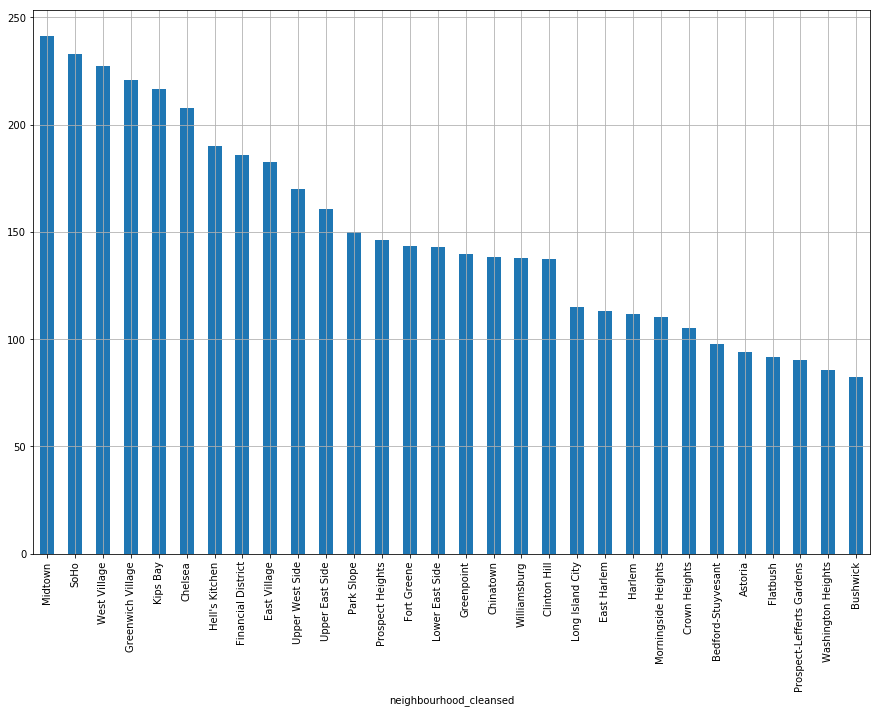

In [328]:
#now lets check what is the price for different neighbourhoods
plt.figure(figsize=(15,10))
strat_test_set.groupby("neighbourhood_cleansed")["price"].mean().sort_values(ascending=False).plot(kind='bar',grid=True)

In [329]:
strat_test_set.groupby("neighbourhood_cleansed")["price"].mean().sort_values(ascending=False)

neighbourhood_cleansed
Midtown                      241.298986
SoHo                         233.086957
West Village                 227.303571
Greenwich Village            220.974684
Kips Bay                     216.783133
Chelsea                      207.679245
Hell's Kitchen               190.128003
Financial District           185.639535
East Village                 182.527633
Upper West Side              169.742197
Upper East Side              160.723054
Park Slope                   149.843137
Prospect Heights             146.014286
Fort Greene                  143.160920
Lower East Side              142.878947
Greenpoint                   139.461212
Chinatown                    138.112524
Williamsburg                 138.020883
Clinton Hill                 137.280992
Long Island City             114.752809
East Harlem                  112.899543
Harlem                       111.833969
Morningside Heights          110.246753
Crown Heights                105.076667
Bedford-Stuyvesan

We can see that the highest price is for Midtown 250 followed by Soho 233 and the least is for Bushwick $82

As **price** is our dependent variable.We will try to understand how is price related to different commodities.

In [250]:
df.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')

In [297]:
sns.scatterplot(df['num_keywords'],df['shares'],hue=df['l'])

20.0

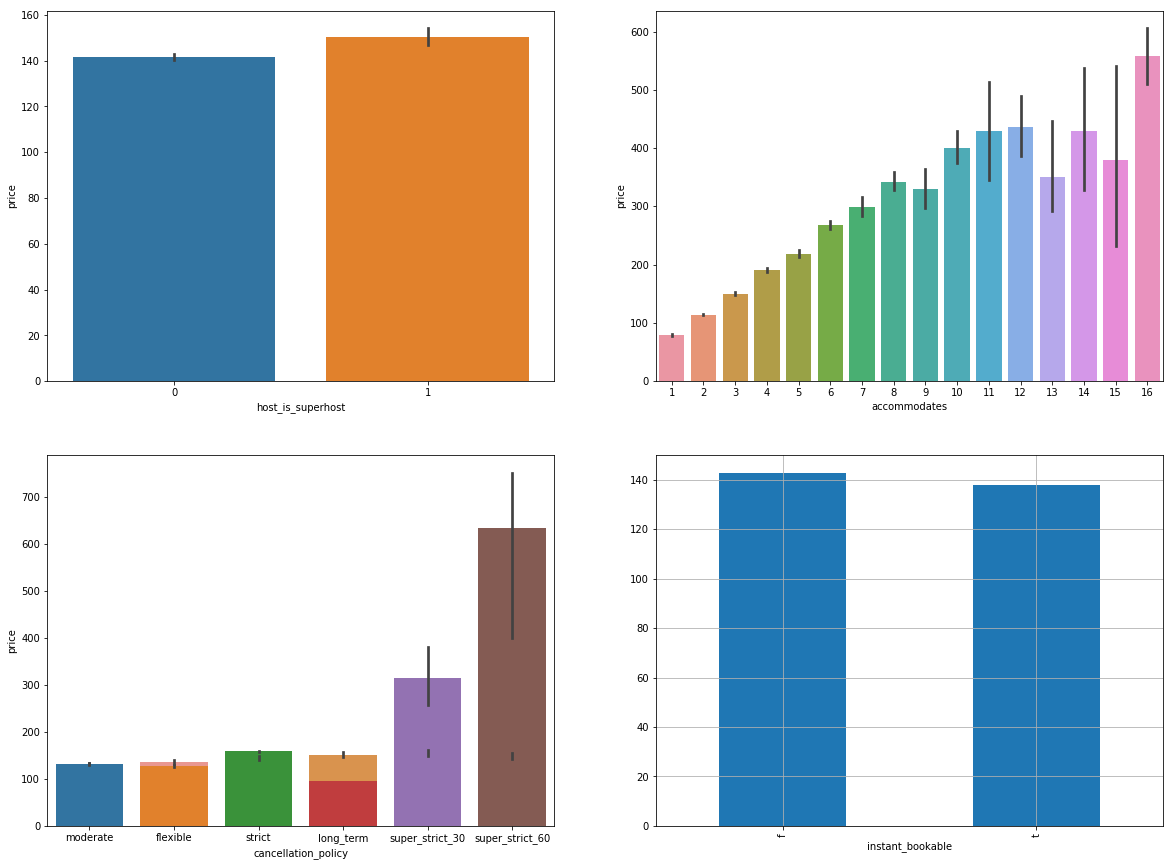

In [334]:
plt.show()
fig,ax = plt.subplots(2,2, figsize=(20,15))                      
sns.barplot(df['host_is_superhost'],df['price'],ax=ax[0,0])
sns.barplot(df['accommodates'],df['price'],ax=ax[0,1])
sns.barplot(df['availability_30'],df['price'],ax=ax[1,0])
sns.barplot(df['cancellation_policy'],df['price'],ax=ax[1,0])
#sns.barplot(df['instant_bookable'],df['price'],ax=ax[1,1])
strat_test_set.groupby("instant_bookable")["price"].mean().sort_values(ascending=False).plot(ax=ax[1,1],kind='bar',grid=True)

The price for hotels where host is the superhost is high.

Price increases as accommodates inncrease ehic makes sense because more the accommodates more would be the price

Hotels with cancellation policy super_strict_60 and super_strict_30 is more.

Instant bookable hotels have less price comapred to non instant bookable hotels.

In [368]:
ab = strat_train_set.copy()

<Figure size 1440x1080 with 0 Axes>

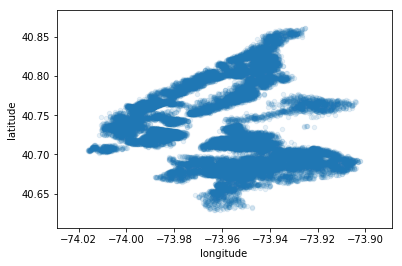

In [338]:
#checking locations of the hotels trying to get the map
plt.figure(figsize=(20,15))
ab.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

In [340]:
#next we will try to understand the hotels with their location how is it related to price
#we will take only the main locations where the number of hotel is more
new = ab[(ab["longitude"]>-74.02)&(ab["latitude"]>40.66)].reset_index(drop=True)

new = new[new["longitude"]<-73.91].reset_index(drop=True)

# And only look at locations under $600
new = new[new["price"]<600].reset_index(drop=True)


<Figure size 1440x1440 with 0 Axes>

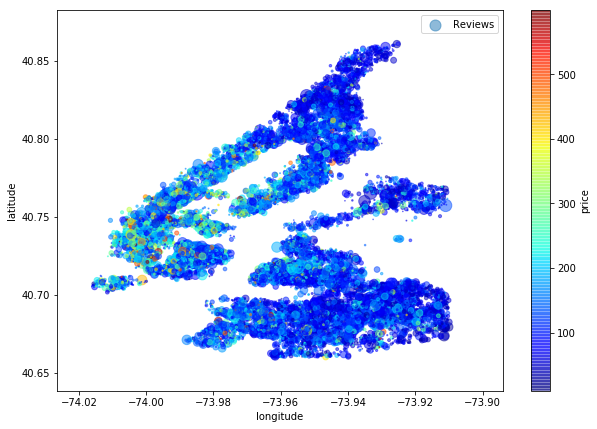

In [342]:
plt.figure(figsize=(20,20))
new.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=new["number_of_reviews"]/2, label="Reviews", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

So from the above plot we can understand that majority of the hotels in location between **lat 40.72 and long-74.01** to **lat 40.76 and long-73.98** are costlier compared to others.There are few exceptions. Few hotels at some locations are costly

Now lets understand the correlation between different features

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

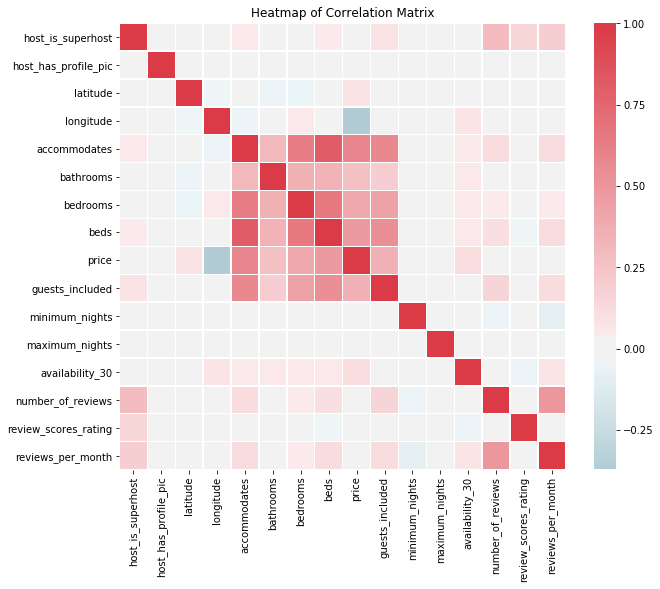

In [346]:
corr_matrix = ab.corr()

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

#Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
           yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [347]:
corr_matrix["price"].sort_values(ascending=False)

price                   1.000000
accommodates            0.584678
beds                    0.483464
bedrooms                0.404810
guests_included         0.351984
bathrooms               0.269634
availability_30         0.113050
latitude                0.079423
review_scores_rating    0.035143
host_is_superhost       0.024893
number_of_reviews       0.000255
maximum_nights         -0.001955
minimum_nights         -0.006284
reviews_per_month      -0.006582
host_has_profile_pic   -0.007383
longitude              -0.370168
Name: price, dtype: float64

From the above correlation matrix we can infer that price is correlated to accomodation:0.58 followed by beds bedroom guests_included, bathrooms and also negatively correlated to longitude

So as the values of these features increase the value of price increase.

So it quite simple that as the accommodation or beds or bedrooms increase the price will increase.

In [349]:
def grouping(data,grpnum):
    grp=pd.qcut(data["review_scores_rating"],grpnum,labels=False)
    data["ranks"]=grp
    return data
dfm=grouping(ab,3)
dfm.head()

,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month,ranks
32466,0,1,Williamsburg,40.708939,-73.957463,Apartment,Entire home/apt,4,1,1.0,...,3,1125,4,25,93.000000,f,f,moderate,1.140000,0
2179,0,1,Bedford-Stuyvesant,40.681937,-73.940679,Apartment,Entire home/apt,6,1,1.0,...,1,100,19,32,89.000000,f,f,moderate,0.660000,0
21257,0,1,Long Island City,40.744815,-73.944655,Apartment,Entire home/apt,4,1,1.0,...,2,1125,10,6,100.000000,t,t,moderate,6.000000,2
33010,0,1,Williamsburg,40.719499,-73.955760,Apartment,Private room,2,1,1.0,...,4,10,0,0,93.487492,f,f,moderate,1.446368,0
15820,0,1,Greenpoint,40.733568,-73.954387,Apartment,Private room,2,1,1.0,...,2,1125,15,11,98.000000,f,f,moderate,4.580000,2


In [353]:
num=['int16','int32','int64','float16','float32','float64']
df_numm=ab.select_dtypes(include=num)
df_numm.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'number_of_reviews', 'review_scores_rating',
       'reviews_per_month', 'ranks'],
      dtype='object')

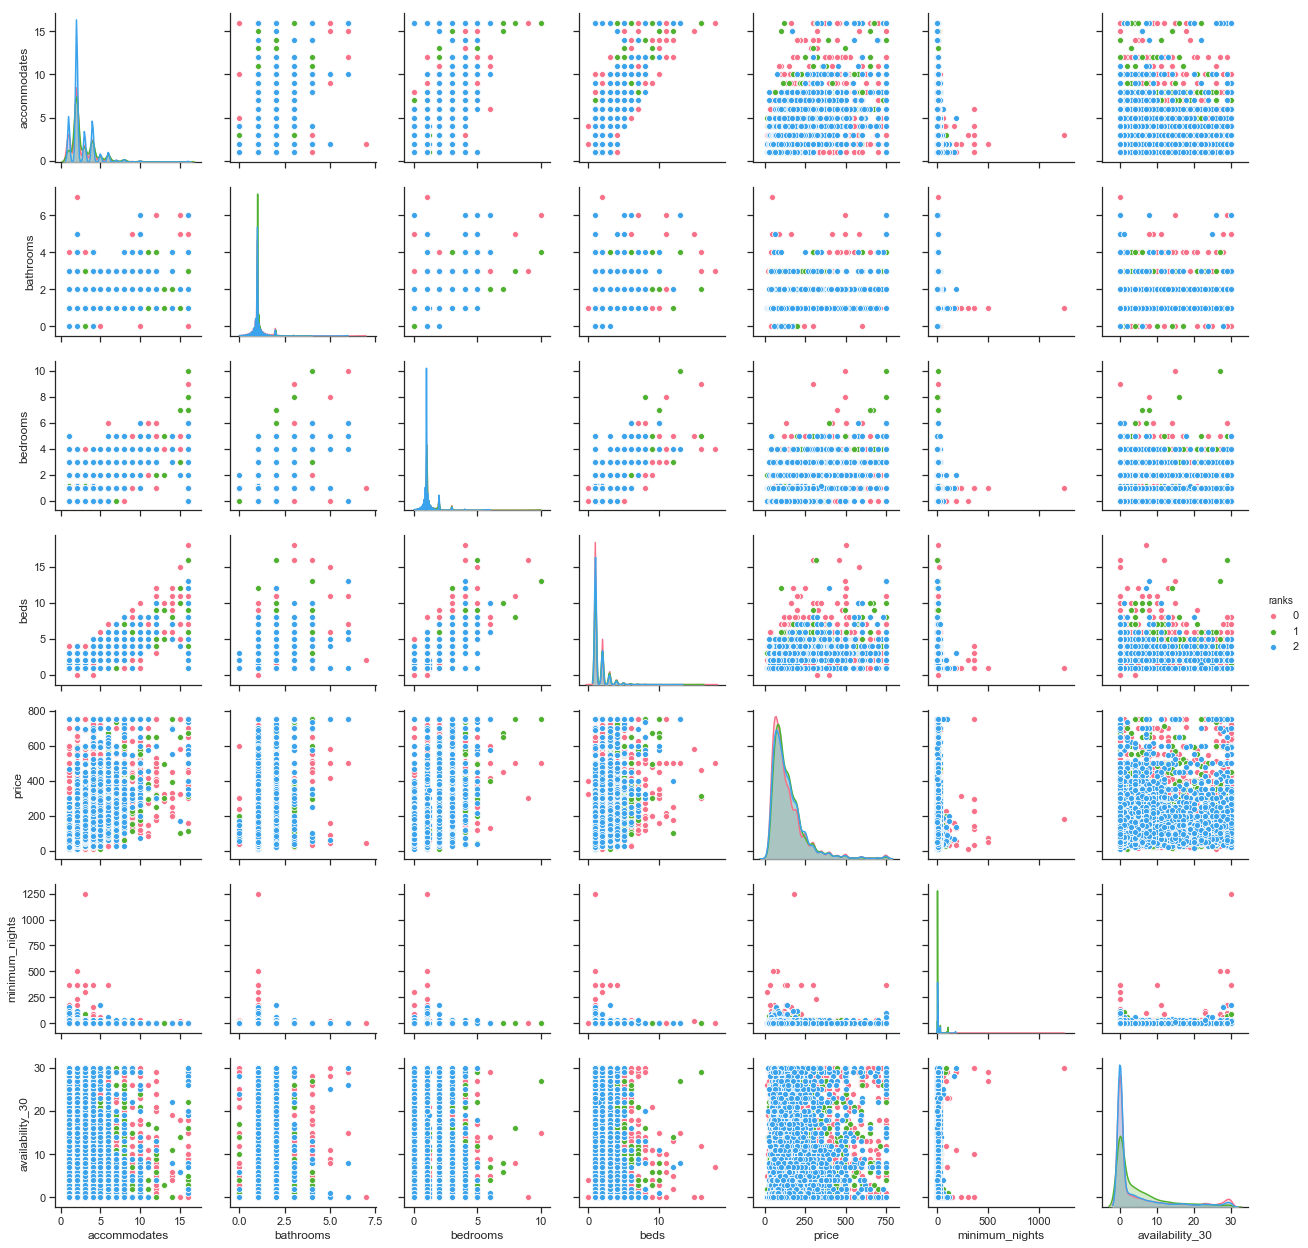

In [356]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(ab, vars = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
                         'minimum_nights','availability_30'] ,hue='ranks', palette='husl')
plt.show()

From the above pairplot we can see that price of all the groups according to rating is almost similar

The hotels which got more reviews were available for more number of days

We can also see hotels with more number of views had more number of bathrooms and bedrooms.

In [391]:
#Now we will create some new features
df["bedrooms_per_person"] = df["bedrooms"]/df["accommodates"]
df["bathrooms_per_person"] = df["bathrooms"]/df["accommodates"]

In [499]:
df['bedrooms']=df['bedrooms'].astype(int)

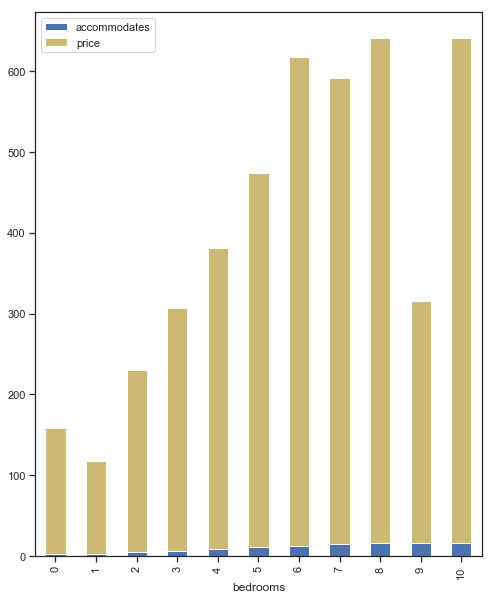

In [502]:
A=df.groupby('bedrooms')['accommodates','price'].mean()
A.plot(kind='bar',stacked=True,color=['b','y'])

As the number of bedrooms increased the number of accommodates and price also increased.

There's an exceptional case for hotels with 9 number of bedrooms.The price was less compares to others.

In [370]:
ab.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'reviews_per_month', 'bedrooms_per_person', 'bathrooms_per_person'],
      dtype='object')

In [390]:
df.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')

# Lets prepare data for models

In [392]:
import copy
new_df1=copy.deepcopy(df)

In [393]:
new_df1=new_df1[['neighbourhood_cleansed',"longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights",
       "accommodates","bathrooms","bedrooms","beds","bed_type","property_type","room_type","availability_30",
       'guests_included',"host_has_profile_pic","host_is_superhost","cancellation_policy",'bedrooms_per_person', 
       'bathrooms_per_person']]

In [394]:
new_df1.head()

,neighbourhood_cleansed,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,accommodates,bathrooms,bedrooms,beds,bed_type,property_type,room_type,availability_30,guests_included,host_has_profile_pic,host_is_superhost,cancellation_policy,bedrooms_per_person,bathrooms_per_person
0,Astoria,-73.914037,40.754485,97.0,12,1,2,1,1.0,2.0,Real Bed,Apartment,Private room,26,1,1,0,moderate,0.5,0.5
1,Astoria,-73.915397,40.759021,93.0,12,4,1,1,1.0,1.0,Real Bed,Apartment,Private room,21,1,1,0,flexible,1.0,1.0
2,Astoria,-73.918473,40.758123,96.0,20,1,2,1,1.0,1.0,Real Bed,Apartment,Private room,24,1,1,0,flexible,0.5,0.5
3,Astoria,-73.918283,40.758746,94.0,23,1,2,1,1.0,1.0,Real Bed,House,Private room,16,2,1,1,flexible,0.5,0.5
4,Astoria,-73.915779,40.755677,100.0,17,3,2,1,1.0,1.0,Real Bed,Apartment,Private room,23,1,1,0,strict,0.5,0.5


In [395]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in ["neighbourhood_cleansed"]:
    new_df1[col+"_code"] = le.fit_transform(new_df1[col])

In [396]:
for col in ["property_type"]:
    new_df1[col+"_code"] = le.fit_transform(new_df1[col])

In [397]:
for col in ["bed_type"]:
    new_df1[col+"_code"] = le.fit_transform(new_df1[col])
for col in ["room_type"]:
    new_df1[col+"_code"] = le.fit_transform(new_df1[col])
for col in ["guests_included"]:
    new_df1[col+"_code"] = le.fit_transform(new_df1[col])
for col in ["cancellation_policy"]:
    new_df1[col+"_code"] = le.fit_transform(new_df1[col])

In [398]:
new_df1=new_df1.drop(['neighbourhood_cleansed','bed_type','property_type', 'room_type',
                      'guests_included','cancellation_policy'],axis=1)

In [399]:
ab.property_type.value_counts()

Apartment          24473
House               1155
Loft                 582
Townhouse            491
Condominium          346
Other                147
Timeshare             71
Bed & Breakfast       63
Guesthouse            31
Guest suite           24
Boutique hotel        20
Dorm                  13
Hostel                11
Bungalow               4
Villa                  3
Name: property_type, dtype: int64

In [401]:
new_df1.head()

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,accommodates,bathrooms,bedrooms,beds,availability_30,host_has_profile_pic,host_is_superhost,bedrooms_per_person,bathrooms_per_person,neighbourhood_cleansed_code,property_type_code,bed_type_code,room_type_code,guests_included_code,cancellation_policy_code
0,-73.914037,40.754485,97.0,12,1,2,1,1.0,2.0,26,1,0,0.5,0.5,0,0,4,1,0,2
1,-73.915397,40.759021,93.0,12,4,1,1,1.0,1.0,21,1,0,1.0,1.0,0,0,4,1,0,0
2,-73.918473,40.758123,96.0,20,1,2,1,1.0,1.0,24,1,0,0.5,0.5,0,0,4,1,0,0
3,-73.918283,40.758746,94.0,23,1,2,1,1.0,1.0,16,1,1,0.5,0.5,0,9,4,1,1,0
4,-73.915779,40.755677,100.0,17,3,2,1,1.0,1.0,23,1,0,0.5,0.5,0,0,4,1,0,3


In [475]:
new_df1['bed_type_code'].value_counts()

4    33380
2      355
3      271
0      194
1       93
Name: bed_type_code, dtype: int64

In [476]:
df['bed_type'].value_counts()

Real Bed         33380
Futon              355
Pull-out Sofa      271
Airbed             194
Couch               93
Name: bed_type, dtype: int64

# Applying train test split on the data

In [406]:
#taking X & Y
x=new_df1.copy()
y=df['price']

In [407]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [408]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(24005, 20)
(24005,)
(10288, 20)
(10288,)


In [422]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [423]:
print(f'R^2 score: {lin_reg.score(xtrain,ytrain)}')

R^2 score: 0.5585299321541328


In [424]:
print(f'R^2 score: {lin_reg.score(xtest,ytest)}')

R^2 score: 0.5742987896136977


In [425]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
print(f'R^2 score: {rfr.score(xtrain,ytrain)}')

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2 score: 0.9293012841374095


In [426]:
print(f'R^2 score: {rfr.score(xtest,ytest)}')

R^2 score: 0.6054562575362892


In [427]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(x,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.157235
Best score using built-in LassoCV: 0.557498


In [428]:
from scipy.stats import zscore
df_scaled=new_df1.apply(zscore)
df_scaled.head()

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,accommodates,bathrooms,bedrooms,beds,availability_30,host_has_profile_pic,host_is_superhost,bedrooms_per_person,bathrooms_per_person,neighbourhood_cleansed_code,property_type_code,bed_type_code,room_type_code,guests_included_code,cancellation_policy_code
0,1.909716,0.403345,0.488300,-0.188207,-0.251273,-0.434216,-0.276499,-0.198948,0.504436,2.569794,0.050432,-0.340667,0.033247,-0.066118,-1.459614,-0.331357,0.1481,0.89404,-0.446910,0.127432
1,1.853542,0.498533,-0.071004,-0.188207,-0.006196,-1.005306,-0.276499,-0.198948,-0.522136,1.960622,0.050432,-0.340667,1.702989,1.575797,-1.459614,-0.331357,0.1481,0.89404,-0.446910,-1.424143
2,1.726560,0.479686,0.348474,0.051107,-0.251273,-0.434216,-0.276499,-0.198948,-0.522136,2.326125,0.050432,-0.340667,0.033247,-0.066118,-1.459614,-0.331357,0.1481,0.89404,-0.446910,-1.424143
3,1.734408,0.492763,0.068822,0.140850,-0.251273,-0.434216,-0.276499,-0.198948,-0.522136,1.351451,0.050432,2.935414,0.033247,-0.066118,-1.459614,2.679835,0.1481,0.89404,0.515348,-1.424143
4,1.837761,0.428353,0.907777,-0.038636,-0.087888,-0.434216,-0.276499,-0.198948,-0.522136,2.204291,0.050432,-0.340667,0.033247,-0.066118,-1.459614,-0.331357,0.1481,0.89404,-0.446910,0.903219


In [421]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df_scaled,y,test_size=0.3,random_state=1)

# Fine tune model

In [430]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [431]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeRegressor(random_state=42), xtrain, ytrain,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [432]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [91.61802295 91.58116249 95.59241599 91.7073311  87.21648065 94.58576957
 86.54806268 89.24126455 91.00758912 91.52673879]
Mean: 91.06248378935302
Standard deviation: 2.6950775786238905


In [433]:
lin_scores = cross_val_score(LinearRegression(), xtrain, ytrain,
                             scoring="neg_mean_absolute_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
## bad performance, might need some regularisation.

Scores: [6.82606826 6.70328949 6.71043863 6.7495374  6.77215152 6.8169077
 6.75637294 6.71237028 6.76627833 6.74977629]
Mean: 6.756319083923485
Standard deviation: 0.039778428406410264


In [434]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(xtrain, ytrain)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [436]:
from sklearn.metrics import mean_squared_error
X_pred = forest_reg.predict(xtrain)
forest_mse = mean_squared_error(ytrain, X_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

29.314471086249966

In [437]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, xtrain, ytrain,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [69.97488643 67.23563693 69.60363444 68.03222952 68.05058849 70.73842275
 66.04013001 69.27294906 66.01758317 67.55461572]
Mean: 68.25206765159702
Standard deviation: 1.5333975410398126


In [438]:
scores = cross_val_score(lin_reg,  xtrain, ytrain, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean     71.754706
std       1.924718
min      69.509803
25%      70.326802
50%      70.980520
75%      73.598416
max      74.684101
dtype: float64

In [439]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit( xtrain, ytrain,)
X_pred = svm_reg.predict(xtrain)
svm_mse = mean_squared_error(ytrain, X_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

75.29318295923666

In [440]:
## 30 Seconds to run this code block.
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit( xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [441]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [442]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [443]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print("")
print("Best grid-search performance: ", np.sqrt(-cvres["mean_test_score"].max()))

76.13703971341005 {'max_features': 2, 'n_estimators': 3}
68.33167719230944 {'max_features': 2, 'n_estimators': 10}
65.74509884301237 {'max_features': 2, 'n_estimators': 30}
75.1347367835555 {'max_features': 4, 'n_estimators': 3}
67.50934381134321 {'max_features': 4, 'n_estimators': 10}
65.28555748835868 {'max_features': 4, 'n_estimators': 30}
74.48537863663556 {'max_features': 6, 'n_estimators': 3}
67.16754626676938 {'max_features': 6, 'n_estimators': 10}
64.90350819221227 {'max_features': 6, 'n_estimators': 30}
74.79347324722764 {'max_features': 8, 'n_estimators': 3}
67.5889450815427 {'max_features': 8, 'n_estimators': 10}
65.31186206997347 {'max_features': 8, 'n_estimators': 30}
75.63584516851598 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
68.43499310231766 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
75.53224058822813 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
68.66935052089093 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


In [444]:
# Top five results as presented in a dataframe
pd.DataFrame(grid_search.cv_results_).head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096362,0.010322,0.006401,0.000486,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-5787.421398,-5817.871085,...,-5796.848816,269.239239,18,-1559.063049,-1497.039024,-1510.996148,-1592.157681,-1573.041530,-1546.459486,36.479611
1,0.335258,0.028161,0.021695,0.005036,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-4561.586335,-4760.830999,...,-4669.218108,254.676785,8,-857.537589,-842.020738,-845.828979,-886.072557,-894.799268,-865.251826,21.368173
2,0.956440,0.077503,0.053539,0.010381,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-4281.689818,-4321.993364,...,-4322.418022,230.736204,4,-652.889562,-659.875642,-660.478890,-686.293136,-695.426808,-670.992807,16.691206
3,0.143522,0.008860,0.007996,0.001662,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-5801.784667,-5735.132266,...,-5645.228672,142.263321,14,-1548.421661,-1481.594607,-1465.546873,-1501.380739,-1536.768482,-1506.742473,31.613151
4,0.421711,0.010924,0.017590,0.000489,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-4459.542464,-4647.112437,...,-4557.511502,192.221540,6,-834.007951,-834.083451,-826.355085,-854.176145,-873.055779,-844.335682,17.068983


In [445]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit( xtrain, ytrain)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [448]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print("Best grid-search performance: ", np.sqrt(-cvres["mean_test_score"].max()))

64.36678657597257 {'max_features': 7, 'n_estimators': 180}
66.09687465631453 {'max_features': 5, 'n_estimators': 15}
64.65357904120823 {'max_features': 3, 'n_estimators': 72}
65.49966699431272 {'max_features': 5, 'n_estimators': 21}
64.53113165105381 {'max_features': 7, 'n_estimators': 122}
Best grid-search performance:  64.36678657597257


In [449]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.14939277, 0.09752323, 0.0249524 , 0.03496988, 0.03220057,
       0.10324988, 0.05952285, 0.07062658, 0.03725851, 0.05489664,
       0.00104122, 0.00331453, 0.02374434, 0.03991994, 0.03782593,
       0.0181195 , 0.00293685, 0.17456253, 0.01918789, 0.01475394])

In [450]:
feats = pd.DataFrame()
feats["Name"] = list(xtrain.columns)
feats["Score"] = feature_importances

In [451]:
feats.sort_values("Score",ascending=False).round(5).head(20)

,Name,Score
17,room_type_code,0.17456
0,longitude,0.14939
5,accommodates,0.10325
1,latitude,0.09752
7,bedrooms,0.07063
6,bathrooms,0.05952
9,availability_30,0.05490
13,bathrooms_per_person,0.03992
14,neighbourhood_cleansed_code,0.03783
8,beds,0.03726


In [454]:
### Now we can test the out of sample performance. 

final_model = grid_search.best_estimator_

X_test = xtest.copy()
y_test = ytest.copy()


final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [455]:
final_rmse

61.38496169306129

In [457]:
from sklearn.metrics import mean_absolute_error
final_mae = mean_absolute_error(y_test, final_predictions)

In [458]:
final_mae 

37.11289602236626

In [459]:
# Defining our Sample Client Data
from dateutil import parser
dict_client = {}

dict_client["neighbourhood_cleansed"] = "Harlem"
dict_client["longitude"] = -73.783909
dict_client["latitude"] = 40.8498289
dict_client["review_scores_rating"] = 95
dict_client["number_of_reviews"] = 53
dict_client["minimum_nights"] = 3
dict_client["accommodates"] = 10
dict_client["bathrooms"] = 4
dict_client["bedrooms"] = 5
dict_client["beds"] = 7
dict_client["bed_type"] = 'Real Bed'
dict_client["property_type"] = "House"
dict_client["room_type"] = "Entire home/apt"
dict_client["availability_30"] = 25
dict_client["host_has_profile_pic"] = 1  ## 1 for yes, 0 for no
dict_client["host_is_superhost"] = 1
dict_client["cancellation_policy"] = "strict"

In [460]:
df_client = pd.DataFrame.from_dict(dict_client, orient='index').T
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
neighbourhood_cleansed    1 non-null object
longitude                 1 non-null object
latitude                  1 non-null object
review_scores_rating      1 non-null object
number_of_reviews         1 non-null object
minimum_nights            1 non-null object
accommodates              1 non-null object
bathrooms                 1 non-null object
bedrooms                  1 non-null object
beds                      1 non-null object
bed_type                  1 non-null object
property_type             1 non-null object
room_type                 1 non-null object
availability_30           1 non-null object
host_has_profile_pic      1 non-null object
host_is_superhost         1 non-null object
cancellation_policy       1 non-null object
dtypes: object(17)
memory usage: 216.0+ bytes


In [461]:
df_client.iloc[0]

neighbourhood_cleansed             Harlem
longitude                        -73.7839
latitude                          40.8498
review_scores_rating                   95
number_of_reviews                      53
minimum_nights                          3
accommodates                           10
bathrooms                               4
bedrooms                                5
beds                                    7
bed_type                         Real Bed
property_type                       House
room_type                 Entire home/apt
availability_30                        25
host_has_profile_pic                    1
host_is_superhost                       1
cancellation_policy                strict
Name: 0, dtype: object

In [474]:
df_client = pd.DataFrame.from_dict(dict_client, orient='index').T

print(df_client.columns)
df_client

Index(['neighbourhood_cleansed', 'longitude', 'latitude',
       'review_scores_rating', 'number_of_reviews', 'minimum_nights',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'property_type', 'room_type', 'availability_30', 'host_has_profile_pic',
       'host_is_superhost', 'cancellation_policy'],
      dtype='object')


,neighbourhood_cleansed,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,accommodates,bathrooms,bedrooms,beds,bed_type,property_type,room_type,availability_30,host_has_profile_pic,host_is_superhost,cancellation_policy
0,Harlem,-73.7839,40.8498,95,53,3,10,4,5,7,Real Bed,House,Entire home/apt,25,1,1,strict


In [478]:
df_client["neighbourhood_cleansed_code"]=14
df_client['bed_type_code']=4
df_client['property_type_code']=9
df_client['room_type_code']=0
df_client['cancellation_policy_code']=3
df_client["bedrooms_per_person"] = df["bedrooms"]/df["accommodates"]
df_client["bathrooms_per_person"] = df["bathrooms"]/df["accommodates"]

In [489]:
df_client['guests_included_code']=1

In [490]:
xtrain.shape

(24005, 20)

In [491]:
df_client.shape

(1, 20)

In [481]:
df_client=df_client.drop(['neighbourhood_cleansed','property_type','bed_type','room_type','cancellation_policy'],axis=1)

In [493]:
client_pred = final_model.predict(df_client)
client_pred

array([460.13333333])

In [494]:
### Client should be charging about ~$280 more. 
print('\x1b[1;31m'+str(client_pred[0])+'\x1b[0m')
print('\x1b[1;31m'+str(-500)+'\x1b[0m')
print('\x1b[1;31m'+"= "+str(client_pred[0]-500)+'\x1b[0m')

460.1333333333333
-500
= -39.866666666666674


the hotel host is charging $40 more 

He should charge $460 for the above constraints